# Radiation Part 1 Tutorial
Explore basic radiation concepts with Python 3!

Requirements:
1. Python 3.6
2. Jupyter Notebook
3. Matplotlib
4. Numpy

<p>Created by: Nick Dawson aka AtmoGuy
<br>Revised 2019/07/24


---

## Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Lets create variables for equation (1) from [Radiation Part 1](https://atmoguy.com/radiation-p1)

In [2]:
pi = 3.14
c = 299792458   # m/s
h = 6.626e-34     # j s
k = 1.3806e-23    # j/K
T_sun = 5772          # K

print('Temperature of the sun is {} Kelvin'.format(T_sun))

Temperature of the sun is 5772 Kelvin


## Next we will create a vector that contains 100 wavelengths from 1e-7 to 4e-6

In [3]:
wavelengths = np.linspace(1e-7, 11e-6, 500) # meters
print(wavelengths[0:10])


[1.00000000e-07 1.21843687e-07 1.43687375e-07 1.65531062e-07
 1.87374749e-07 2.09218437e-07 2.31062124e-07 2.52905812e-07
 2.74749499e-07 2.96593186e-07]


## Now to create equation (1) from [Radiation Part 1](https://atmoguy.com/radiation-p1)

In [4]:
irradiance_left = (2*pi*h*c**2)*(wavelengths**-5)
irradiance_right = 1/(np.exp((h*c)/(k*T_sun*wavelengths))-1)
irradiance_sun = irradiance_left * irradiance_right
print(irradiance_sun[0:10])

[5.58465405e+08 1.81468280e+10 1.78421295e+11 8.67720262e+11
 2.70177027e+12 6.24350096e+12 1.17208696e+13 1.89449318e+13
 2.74128097e+13 3.64816749e+13]


## Now let's plot the irradiance values as a function of wavelength

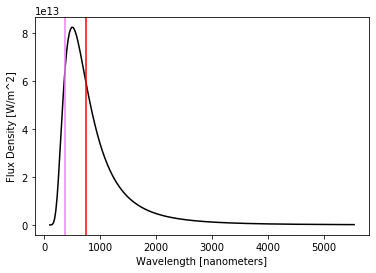

---
Max flux density is 82317697525992.36 W/m2
Max flux density occurs at 493.2 nm
violet line = low end of visible light wavelengths
red line = high end of visible light wavelengths


In [5]:
plt.plot(wavelengths[0:250]*1e9, irradiance_sun[0:250], color = 'black') # multiply by 1e9 to convert from meters to nanometers
plt.xlabel('Wavelength [nanometers]')
plt.ylabel('Flux Density [W/m^2]')
plt.axvline(x=380, color = 'violet')
plt.axvline(x=740, color = 'red')
plt.show()
print('---')
print('Max flux density is {} W/m2'.format(np.max(irradiance_sun)))
index_of_max = np.argmax(irradiance_sun)
print('Max flux density occurs at {:.1f} nm'.format(wavelengths[index_of_max]*1e9))
print('violet line = low end of visible light wavelengths')
print('red line = high end of visible light wavelengths')

## As we can see, the peak is right just under 500 nm which makes it a bluish green!

---

## Now let's also plot a human's flux density distribution

In [6]:
T_human = 310   # Roughly temperature of an average human [K]

irradiance_left = (2*pi*h*c**2)*(wavelengths**-5)
irradiance_right = 1/(np.exp((h*c)/(k*T_human*wavelengths))-1)
irradiance_human = irradiance_left * irradiance_right

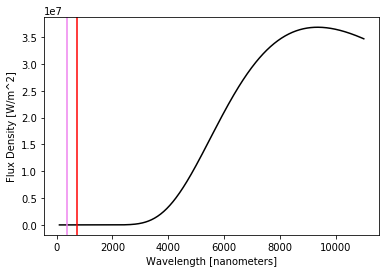

---
Max flux density is 36813246.958005354 W/m2
Max flux density occurs at 9339.9 nm
violet line = low end of visible light wavelengths
red line = high end of visible light wavelengths


In [7]:
plt.plot(wavelengths*1e9, irradiance_human, color = 'black') # multiply by 1e9 to convert from meters to nanometers
plt.xlabel('Wavelength [nanometers]')
plt.ylabel('Flux Density [W/m^2]')
plt.axvline(x=380, color = 'violet')
plt.axvline(x=740, color = 'red')
plt.show()
print('---')
print('Max flux density is {} W/m2'.format(np.max(irradiance_human)))
index_of_max = np.argmax(irradiance_human)
print('Max flux density occurs at {:.1f} nm'.format(wavelengths[index_of_max]*1e9))
print('violet line = low end of visible light wavelengths')
print('red line = high end of visible light wavelengths')

## It looks like a standard human's peak is shifted into the infrared spectrum (~ 9 micrometers). Now let's plot both on the same graph. The Sun's flux density is so much larger than Earth's that we need to normalize them by their respective maximum values.

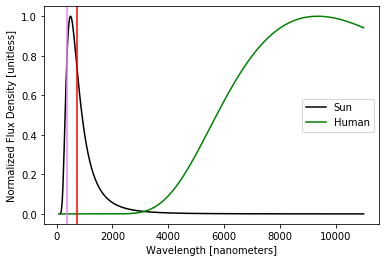

---
Purple and Red show the visible light extents
Everything to the right of the red line is within the infrared section of the electromagnetic energy spectrum


In [8]:
plt.plot(wavelengths*1e9, irradiance_sun/np.max(irradiance_sun), color = 'black') # multiply by 1e9 to convert from meters to nanometers
plt.plot(wavelengths*1e9, irradiance_human/np.max(irradiance_human), color = 'green')
plt.xlabel('Wavelength [nanometers]')
plt.ylabel('Normalized Flux Density [unitless]')
plt.axvline(x=380, color = 'violet')
plt.axvline(x=740, color = 'red')
plt.legend(['Sun','Human'])
plt.show()
print('---')
print('Purple and Red show the visible light extents')
print('Everything to the right of the red line is within the infrared section of the electromagnetic energy spectrum')